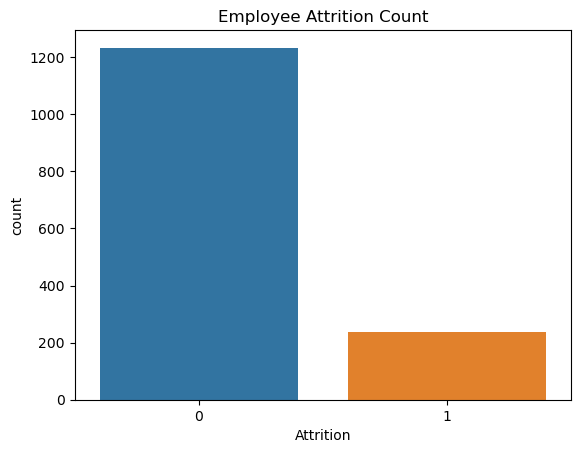

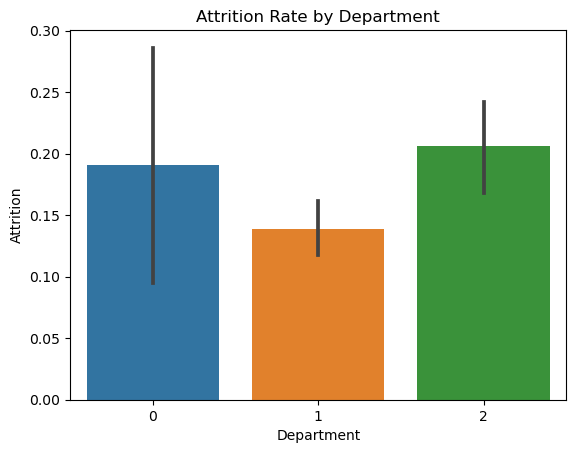

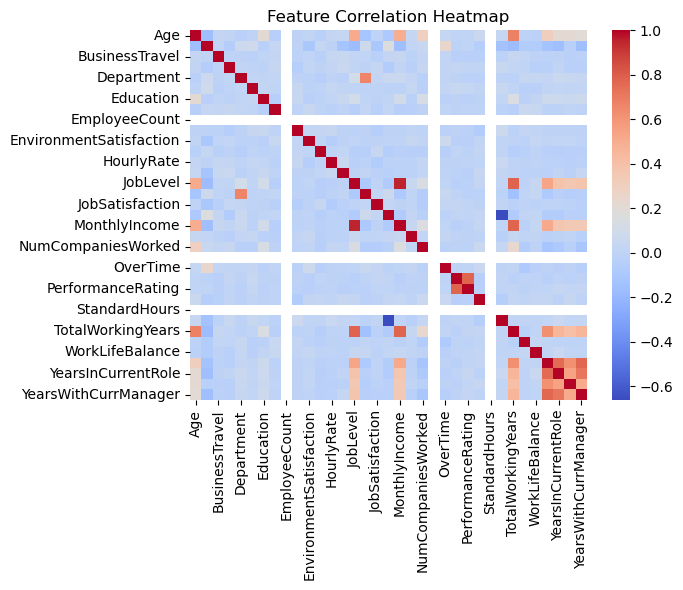

Confusion Matrix:
 [[249   6]
 [ 26  13]]

Accuracy: 0.891156462585034

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294


Top 10 features influencing Attrition:
                    Feature  Coefficient  Absolute Coefficient
21                 OverTime     0.868459              0.868459
30           YearsAtCompany     0.695590              0.695590
31       YearsInCurrentRole    -0.671506              0.671506
19       NumCompaniesWorked     0.468661              0.468661
32  YearsSinceLastPromotion     0.463627              0.463627
16            MaritalStatus     0.449261              0.449261
33     YearsWithCurrManager    -0.440241              0.440241
13                 JobLevel    -0

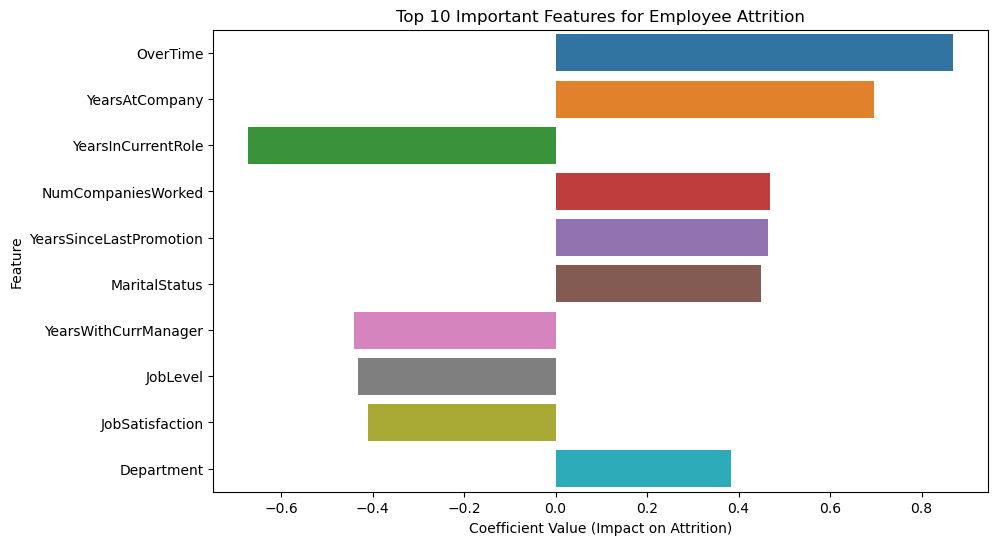

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading data
df = pd.read_csv("C:/Users/91821/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Cleaning data
df.drop_duplicates(inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Visualizations
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()

sns.barplot(x='Department', y='Attrition', data=df)
plt.title("Attrition Rate by Department")
plt.show()

sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Spliting data
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nAccuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))



feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sorting by absolute coefficient value
feature_importance['Absolute Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display top 10 features influencing attrition
print("\nTop 10 features influencing Attrition:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features for Employee Attrition")
plt.xlabel("Coefficient Value (Impact on Attrition)")
plt.ylabel("Feature")
plt.show()
